In [33]:
# Final Exam - Group 1
#   Terrance Taubes -- 2017951160 -- terrytaubes@gwu.edu
#   Choi, Jae Hun   -- 2013170173 -- hun7516@naver.com

# Breast Cancer Classification  --  Machine Learning Application

#### Dataset from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# 1) Load and Preprocess Dataset

## Separate each line of data, place into lists 'x' and 'y'
* **x: list to hold attributes of each data example**
* **y: list to hold classification of each data example (1 = malignant, 0 = benign)**

In [36]:
## x: Attributes
## y: Class (1=malignant, 0=benign)
x = []
y = []

attrCols = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10]

# Reading from .data file
with open("breast-cancer-wisconsin.data") as data_file:
    lines = data_file.readlines()
    entries = []
    
    for line in lines:
        entry = line.strip().split(",")
        entry = [int(entry[i]) for i in attrCols]

        if entry[9] == 2:
            entry[9] = 0
        elif entry[9] == 4:
            entry[9] = 1
        

        entries.append(entry)
        x_temp = [entry[i] for i in range(1, 9)]
        
        x.append(np.array(x_temp))
        y.append(np.array(entry[9]))

# 2) Load Data into Pandas DataFrame to visualize

In [37]:
print ">> 699 Total Examples, each with 8 Attributes\n"

print "Data from lists:"
for i in range(15):
    #print entries[i]
    print "  ", x[i], '-', y[i]
print "...\n\n"


headers = ['ID Number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', \
          'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

## DataFrame of Data
data_df = pd.DataFrame(entries, columns=headers)

print "DataFrame:"
data_df.head(15)

>> 699 Total Examples, each with 8 Attributes

Data from lists:
   [5 1 1 1 2 3 1 1] - 0
   [5 4 4 5 7 3 2 1] - 0
   [3 1 1 1 2 3 1 1] - 0
   [6 8 8 1 3 3 7 1] - 0
   [4 1 1 3 2 3 1 1] - 0
   [ 8 10 10  8  7  9  7  1] - 1
   [1 1 1 1 2 3 1 1] - 0
   [2 1 2 1 2 3 1 1] - 0
   [2 1 1 1 2 1 1 5] - 0
   [4 2 1 1 2 2 1 1] - 0
   [1 1 1 1 1 3 1 1] - 0
   [2 1 1 1 2 2 1 1] - 0
   [5 3 3 3 2 4 4 1] - 1
   [1 1 1 1 2 3 1 1] - 0
   [ 8  7  5 10  7  5  5  4] - 1
...


DataFrame:


,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,3,1,1,0
1,1002945,5,4,4,5,7,3,2,1,0
2,1015425,3,1,1,1,2,3,1,1,0
3,1016277,6,8,8,1,3,3,7,1,0
4,1017023,4,1,1,3,2,3,1,1,0
5,1017122,8,10,10,8,7,9,7,1,1
6,1018099,1,1,1,1,2,3,1,1,0
7,1018561,2,1,2,1,2,3,1,1,0
8,1033078,2,1,1,1,2,1,1,5,0
9,1033078,4,2,1,1,2,2,1,1,0


# 3) Split Data into Training and Testing Sets

* **Training Set used to train models - contains 70% of data**
* **Testing Set used to test models - contains 30% of the data**

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

print 'x_train:', '('+str(len(x_train))+',', str(len(x_train[0]))+'),\t', \
      'x_test:', '('+str(len(x_test))+',', str(len(x_test[0]))+')'
    
print 'y_train:', '('+str(len(y_train))+',', str(1)+'),\t', \
      'y_test:', '('+str(len(y_test))+',', str(1)+')'
    

x_train: (489, 8),	x_test: (210, 8)
y_train: (489, 1),	y_test: (210, 1)


# 4) Logistic Regression Classifier

### Logistic Regression calculates the probability of the example being in the positive class (malignant) based on its attributes.
* **if   probability >= 0.5:  class (1)**
* **else probability <  0.5:  class (0)**


## Mean Squared Error: Accuracy Metric -- the closer to 0, the more accurate
## Accuracy: How many correct out of total

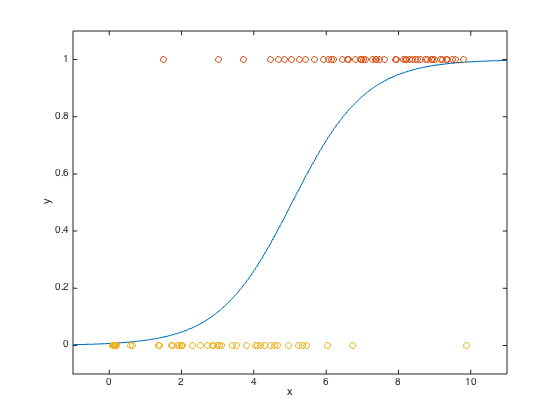

In [40]:
Image('log.png', width=600)

In [41]:
## Logistic Regression Classifier
logRegModel = LogisticRegression(max_iter=300)

# Fit, Train, and Test
logRegModel.fit(x_train, y_train)
logRegPredictTrain = logRegModel.predict(x_train)
logRegPredictTest = logRegModel.predict(x_test)

# Measure accuracy
accuracy = 0
for i in range(len(logRegPredictTest)):
    if logRegPredictTest[i] == y_test[i]:
        accuracy += 1

print "Mean Squared Error - Logistic Regression:\n\tTrain(", \
      round(metrics.mean_squared_error(logRegPredictTrain, y_train), 5), ")\n\tTest(", \
      round(metrics.mean_squared_error(logRegPredictTest, y_test), 5), ")\n"

print 'Accuracy:', str(accuracy) + '/' + str(len(logRegPredictTest)), \
      '---', str(100 * round(float(accuracy) / len(logRegPredictTest), 4)) + '%'


Mean Squared Error - Logistic Regression:
	Train( 0.0409 )
	Test( 0.05714 )

Accuracy: 198/210 --- 94.29%


# 5) Neural Network - Multilayer Perceptron Classifier

### The Multilayer Perceptron takes the examples as inputs and through the hidden layers calculates a probability, and then returns the prediction (1 or 0)

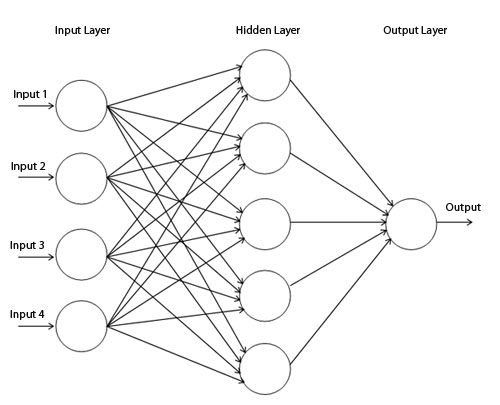

In [42]:
Image('mlp.jpg', width=600)

In [43]:
## Neural Net - Multilayer Perceptron Classifier
neuralNetModel = MLPClassifier(max_iter=300)

# Fit, Test, Train
neuralNetModel.fit(x_train, y_train)
neuralNetPredictTrain = neuralNetModel.predict(x_train)
neuralNetPredictTest = neuralNetModel.predict(x_test)

# Measure accuracy
accuracy = 0
for i in range(len(neuralNetPredictTest)):
    if neuralNetPredictTest[i] == y_test[i]:
        accuracy += 1

print "Mean Squared Error - Multi-Layer Perceptron:\n\tTrain(", \
      round(metrics.mean_squared_error(neuralNetPredictTrain, y_train), 5), ")\n\tTest(", \
      round(metrics.mean_squared_error(neuralNetPredictTest, y_test), 5),")\n"

print 'Accuracy:', str(accuracy) + '/' + str(len(neuralNetPredictTest)), \
      '---', str(100 * round(float(accuracy) / len(neuralNetPredictTest), 4)) + '%'


Mean Squared Error - Multi-Layer Perceptron:
	Train( 0.03067 )
	Test( 0.04762 )

Accuracy: 200/210 --- 95.24%


# 6) Principal Component Analysis and Support Vector Machine

### In order for us to graph our examples on a 2D plane, we must reduce the dimensions of the attributes from 8 to 2. We do this through Principal Component Analysis (PCA) which returns the data with 2 compressed attributes.

### The Support Vector Machine creates a decision boundary between the positive and negative class where there will be the greatest space (margin) between all examples. We will be using a non-linear boundary.

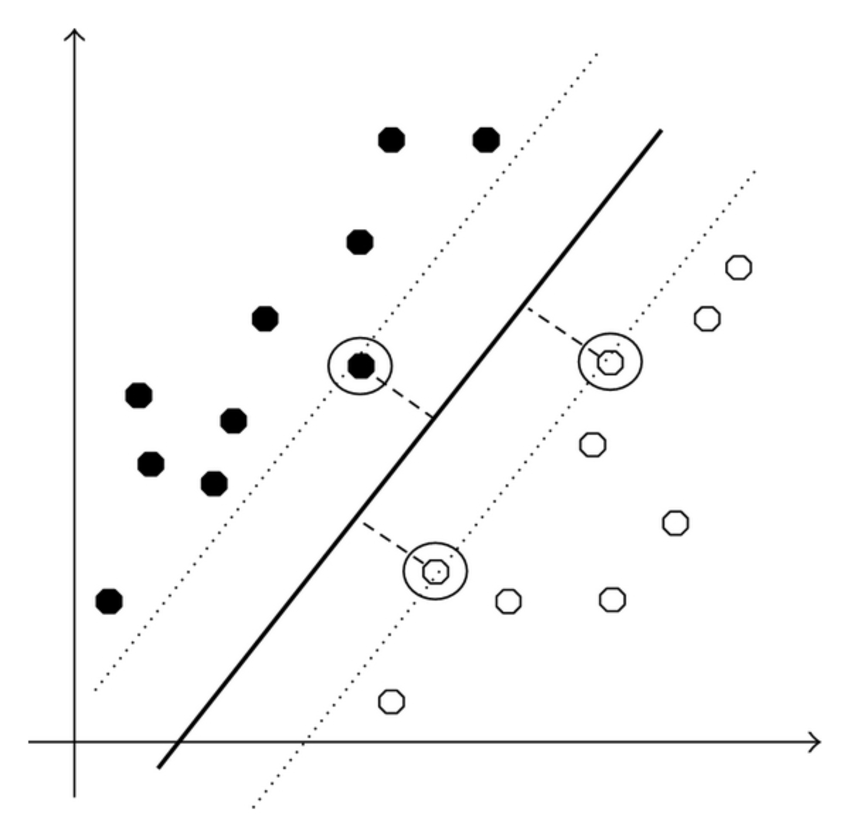

In [44]:
Image('svm.png', width=500)

In [45]:
## Dimensionality Reduction via PCA and Support Vector Classifier
pcaModel = PCA(n_components=2)
svmModel = SVC(kernel='rbf', gamma=0.7, C=0.6)

pcaReduce = pcaModel.fit_transform(x)

print ">> After Dimensionality Reduction:", pcaReduce.shape, '\n'

# Split new compressed data into Training and Testing Sets
x_r_train, x_r_test, y_r_train, y_r_test = train_test_split(pcaReduce, y, \
                                                            test_size=0.3, random_state=15)

# Fit, Train, Test
svmModel.fit(x_r_train, y_r_train)
svmPredictTrain = svmModel.predict(x_r_train)
svmPredictTest = svmModel.predict(x_r_test)

# Measure accuracy
accuracy = 0
for i in range(len(svmPredictTest)):
    if svmPredictTest[i] == y_r_test[i]:
        accuracy += 1


print "Mean Squared Error - Support Vector Machine:\n\tTrain(", \
      round(metrics.mean_squared_error(svmPredictTrain, y_r_train), 5), ")\n\tTest(", \
      round(metrics.mean_squared_error(svmPredictTest, y_r_test), 5),")\n"

print 'Accuracy:', str(accuracy) + '/' + str(len(svmPredictTest)), \
      '---', str(100 * round(float(accuracy) / len(svmPredictTest), 4)) + '%'


>> After Dimensionality Reduction: (699, 2) 

Mean Squared Error - Support Vector Machine:
	Train( 0.02658 )
	Test( 0.04762 )

Accuracy: 200/210 --- 95.24%


In [46]:
## Rearrange Data for Plotting

pos = []; neg = []
pos0 = []; pos1 = []
neg0 = []; neg1 = []
X = []; Y = []

for i in range(len(svmPredictTest)):
    
    if svmPredictTest[i] == 1:
        pos0.append(x_r_test[i][0])
        pos1.append(x_r_test[i][1])
    elif svmPredictTest[i] == 0:
        neg0.append(x_r_test[i][0])
        neg1.append(x_r_test[i][1])

pos.append(pos0); pos.append(pos1)
neg.append(neg0); neg.append(neg1)

X.append(pos[0]); X.append(neg[0])
X = [x for sublist in X for x in sublist]
Y.append(pos[1]); Y.append(neg[1])
Y = [y for sublist in Y for y in sublist]


# 7) Create Decision Boundary and Plot

### Decision boundary built using the SVM Model and a meshgrid
### Plot shows positive (x) and negative (o) classes, separated by decision boundary

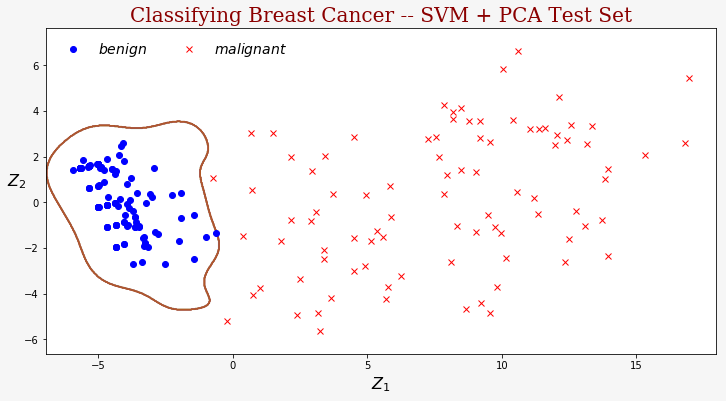

In [47]:
## Create Decision Boundary
h = .02

x_min, x_max = min(X) - 1, max(X) + 1
y_min, y_max = min(Y) - 1, max(Y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svmModel.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)


## Plot
fig, ax = plt.subplots(figsize=(12, 6))

fig.patch.set_facecolor("#e6e6e6")
fig.patch.set_alpha(0.35)


ax.contour(xx, yy, Z, cmap=plt.cm.Paired)
        

ax.plot(neg[0], neg[1], 'bo', label=r"$benign$")
ax.plot(pos[0], pos[1], 'rx', label=r"$malignant$")

xax = ax.set_xlabel("$Z_1$", fontsize=16)
yax = ax.set_ylabel("$Z_2$  ", fontsize=16)
yax.set_rotation(0)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

ax.legend(loc=0, ncol=2, fontsize=14, frameon=False)
ax.set_title("Classifying Breast Cancer -- SVM + PCA Test Set", fontdict=font)

#plt.savefig("classification-plot.pdf", facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


## Interpretation:

### - All models predict the right class for each example with comparable accuracy (all around 95% correct).
### - Benign tumors have characteristics very close together, where as malignant tumors seems to range everywhere else.

## Contributions:

### Jae Hun
* **1) Load and Preprocess Dataset**
* **2) Load Data into Pandas DataFrame to visualize**
* **3) Split Data into Training and Testing Sets**
* **Present**

### Terrance
* **4) Logistic Regression**
* **5) Neural Network - MLP Classifier**
* **6) PCA and SVM**
* **7) Create Decision Boundary and Plot**